In [121]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# Weather data

In [39]:
data_frame = pd.read_csv("MATF_Hackathon_2021/BelgradeAirport_2021-2012.csv")

clean_data = pd.DataFrame()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6,12,13,16,17,18,19,20,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
data_frame.columns

Index(['DateTime', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N',
       'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td',
       'RRR', 'tR', 'E', 'Tg', 'E.', 'sss'],
      dtype='object')

In [45]:
data_frame.iloc[0]

DateTime                         2021-03-31 23:00
T                                            11.9
Po                                         1010.5
P                                          1022.5
Pa                                           -0.5
U                                              67
DD          Wind blowing from the north-northwest
Ff                                              1
ff10                                          NaN
ff3                                           NaN
N                                       no clouds
WW                                               
W1                                            NaN
W2                                            NaN
Tn                                            NaN
Tx                                            NaN
Cl                                            NaN
Nh                                            NaN
H                                             NaN
Cm                                            NaN


### Parse DateTime

In [60]:
def datetime2ymd(in_df, out_df):
    out_df["year"]  = in_df["DateTime"].astype(str).str[:4].astype(int)
    out_df["month"] = in_df["DateTime"].astype(str).str[5:7].astype(int)
    out_df["day"]   = in_df["DateTime"].astype(str).str[8:10].astype(int)
    out_df["hour"]  = in_df["DateTime"].astype(str).str[11:13].astype(int)
    out_df["min"]   = in_df["DateTime"].astype(str).str[14:].astype(int)
    
    return out_df

In [61]:
clean_data = datetime2ymd(data_frame, clean_data)

In [63]:
copy_collumns = ["T", "Po", "U", "Ff", "Tn"]
clean_data[copy_collumns] = data_frame[copy_collumns]

In [62]:
clean_data.head()

,T,Po,U,Ff,Tn,year,month,day,hour,min
0,11.9,1010.5,67,1.0,NaN,2021,3,31,23,0
1,12.9,1010.9,62,1.0,NaN,2021,3,31,22,0
2,14.3,1011.0,57,1.0,NaN,2021,3,31,21,0
3,15.3,1011.0,53,1.0,NaN,2021,3,31,20,0
4,17.5,1011.1,45,3.0,NaN,2021,3,31,19,0


# Target data

In [82]:
target_df = pd.read_csv("MATF_Hackathon_2021/SviPodaci_mStanica_BeogradNBG.csv")
clean_target = pd.DataFrame()

target_df = target_df.rename(columns={"Datum_i_Vreme": "DateTime"})

target_df.head()

,DateTime,MernaStanica,B,CO,NO2,O3,PM10,PM25,SO2
0,2012-06-11 16:00,Beograd Novi Beograd,0.269729,0.590997,63.094881,53.622829,23.109444,9.742659,2.789345
1,2015-03-09 08:00,Beograd Novi Beograd,2.042423,1.113447,19.640968,56.213282,26.856319,19.293327,84.947258
2,2010-05-19 09:00,Beograd Novi Beograd,0.778962,0.905177,26.346479,NaN,22.899085,12.057213,2.703677
3,2010-07-17 00:00,Beograd Novi Beograd,0.686226,0.994739,31.578526,44.185095,29.241251,22.910294,8.567367
4,2018-05-01 00:00,Beograd Novi Beograd,NaN,0.250000,NaN,43.600000,NaN,NaN,12.900000


In [99]:
clean_target = datetime2ymd(target_df, clean_target)
copy_columns = ["B", "CO", "NO2", "O3", "PM10", "PM25", "SO2"]

clean_target[copy_columns] = target_df[copy_columns]
clean_target = clean_target.sort_values(by=["year", "month", "day", "hour", "min"])

clean_target.head()

,year,month,day,hour,min,B,CO,NO2,O3,PM10,PM25,SO2
23026,2009,11,17,20,0,NaN,NaN,NaN,NaN,NaN,54.221211,NaN
28045,2009,11,17,21,0,NaN,NaN,NaN,NaN,NaN,61.848214,NaN
52868,2009,11,17,22,0,NaN,NaN,NaN,NaN,NaN,47.386997,NaN
68772,2009,11,17,23,0,NaN,NaN,NaN,NaN,NaN,42.317648,NaN
41525,2009,11,18,0,0,NaN,NaN,NaN,NaN,NaN,41.457331,NaN


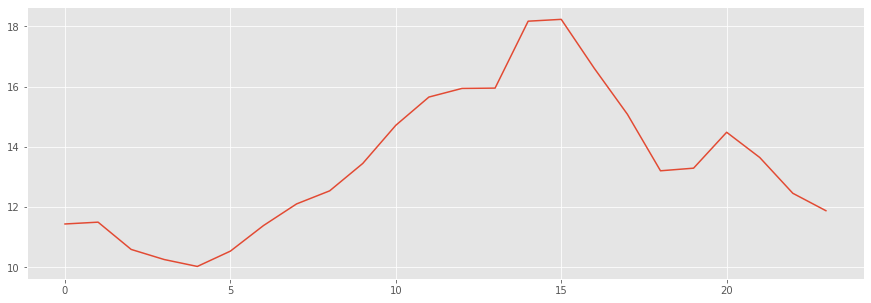

In [180]:
month = clean_target.loc[
    (clean_data["year"].isin([2019, 2020])) &
    (clean_data["month"].isin([10, 11, 12]))
]

hours = []
for hour in range(24):
    hours.append(month.loc[month["hour"] == hour].mean()["SO2"])
    
plt.plot(hours)